In [274]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from sklearn.metrics import cohen_kappa_score
from scipy.stats import pearsonr, spearmanr, kendalltau, wilcoxon

In [10]:
PATH_AGREEMENT = '../data/annotator-agreement/'
PATH_IMAGES = '../assets/images/'

EXP_1 = 'exp_1.csv'
EXP_2 = 'exp_2.csv'

## Data loading

- Experiment 1: Survey with 15 annotators, 20 reviews, 4 ranked categories, a few guidelines.
- Experiment 2: Only me and another annotator, 4 ranked categories, prior discussion about the scheme and precise guidelines.

In [128]:
e_1 = pd.read_csv(PATH_AGREEMENT + EXP_1)
e_2 = pd.read_csv(PATH_AGREEMENT + EXP_2)

## Experiment 1

In [157]:
prim = e_1.dropna().copy()
if 'Unnamed: 0' in prim.columns:
    prim = prim.drop('Unnamed: 0', axis=1)

We remove 2 reviews and 2 annotators that were provoking heavy noise in the data.

In [158]:
prim = prim.drop(index=[14, 16], columns=['14', '5'])

Copy the DataFrame for the second part of the experiment

In [159]:
sec = prim.copy()

#### Part 1

In [160]:
prim['mean'] = prim.mean(axis=1)

In [161]:
prim['std'] = prim.std(axis=1)

In [162]:
prim['our'] = [2, 2, 3, 1, 4, 2, 1, 3, 3, 3, 4, 2, 3, 1, 4, 2, 2, 3]

In [163]:
prim['difference'] = prim['our'] - prim['mean']

In [236]:
prim_metric = prim.drop(['mean', 'std', 'difference'], axis=1)

In [269]:
prim_metric

,0,1,2,3,4,6,7,8,9,10,11,12,13,our
0,1,2,1,3,1,2,2,2,3,3,1,2,3,2
1,3,2,4,2,4,4,3,3,4,3,3,4,4,2
2,4,2,3,4,3,4,4,3,4,4,2,3,4,3
3,1,2,1,2,2,2,2,3,2,3,1,2,2,1
4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
5,1,2,2,2,2,2,2,3,2,3,1,2,1,2
6,2,2,2,2,2,2,2,2,2,2,1,2,2,1
7,3,3,3,3,4,3,4,4,3,3,3,3,3,3
8,4,3,3,3,4,4,3,4,3,3,3,3,3,3
9,3,3,3,3,3,4,3,4,3,3,3,3,4,3


#### Fleiss $\kappa$

In [277]:
prim_cpt = np.asarray([
    [4,6,4,0],
    [0,3,5,6],
    [0,2,5,7],
    [4,8,2,0],
    [0,0,0,14],
    [3,9,2,0],
    [2,12,0,0],
    [0,0,11,3],
    [0,0,10,4],
    [0,0,11,3],
    [0,0,4,10],
    [3,8,3,0],
    [0,0,3,11],
    [4,6,4,0],
    [0,0,8,6],
    [1,9,4,0],
    [3,9,2,0],
    [0,1,10,3]
])

def fleiss_kappa(M):
  """
  See `Fleiss' Kappa <https://en.wikipedia.org/wiki/Fleiss%27_kappa>`_.
  :param M: a matrix of shape (:attr:`N`, :attr:`k`) where `N` is the number of subjects and `k` is the number of categories into which assignments are made. `M[i, j]` represent the number of raters who assigned the `i`th subject to the `j`th category.
  :type M: numpy matrix
  """
  N, k = M.shape  # N is # of items, k is # of categories
  n_annotators = float(np.sum(M[0, :]))  # # of annotators

  p = np.sum(M, axis=0) / (N * n_annotators)
  P = (np.sum(M * M, axis=1) - n_annotators) / (n_annotators * (n_annotators - 1))
  Pbar = np.sum(P) / N
  PbarE = np.sum(p * p)

  kappa = (Pbar - PbarE) / (1 - PbarE)

  return kappa

In [278]:
fleiss_kappa(prim_cpt)

0.3094930463003469

#### Part 2

In [165]:
sec['15'] = [2, 2, 3, 1, 4, 2, 1, 3, 3, 3, 4, 2, 3, 1, 4, 2, 2, 3]

In [167]:
sec = sec.T

In [171]:
sec_mean = np.asarray(sec.mean(axis=1))

#### Plotting

In [174]:
labels = list(range(1, 19))
x = np.arange(len(labels))
xlin = np.linspace(x.min(), x.max(), 200)

width = 0.27

In [178]:
sec

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,17,18,19
0,1,3,4,1,4,1,2,3,4,3,4,2,4,3,3,2,3,3
1,2,2,2,2,4,2,2,3,3,3,3,2,4,2,3,2,2,3
2,1,4,3,1,4,2,2,3,3,3,4,1,4,2,3,1,1,3
3,3,2,4,2,4,2,2,3,3,3,3,2,3,2,3,2,2,3
4,1,4,3,2,4,2,2,4,4,3,3,1,4,2,3,2,1,3
6,2,4,4,2,4,2,2,3,4,4,3,2,4,1,4,2,2,4
7,2,3,4,2,4,2,2,4,3,3,4,3,4,3,4,3,2,4
8,2,3,3,3,4,3,2,4,4,4,4,3,4,1,4,3,2,3
9,3,4,4,2,4,2,2,3,3,3,4,2,4,2,3,2,2,3
10,3,3,4,3,4,3,2,3,3,3,4,3,4,3,4,3,3,3


In [192]:
sec_mean = sec.mean(axis=0)

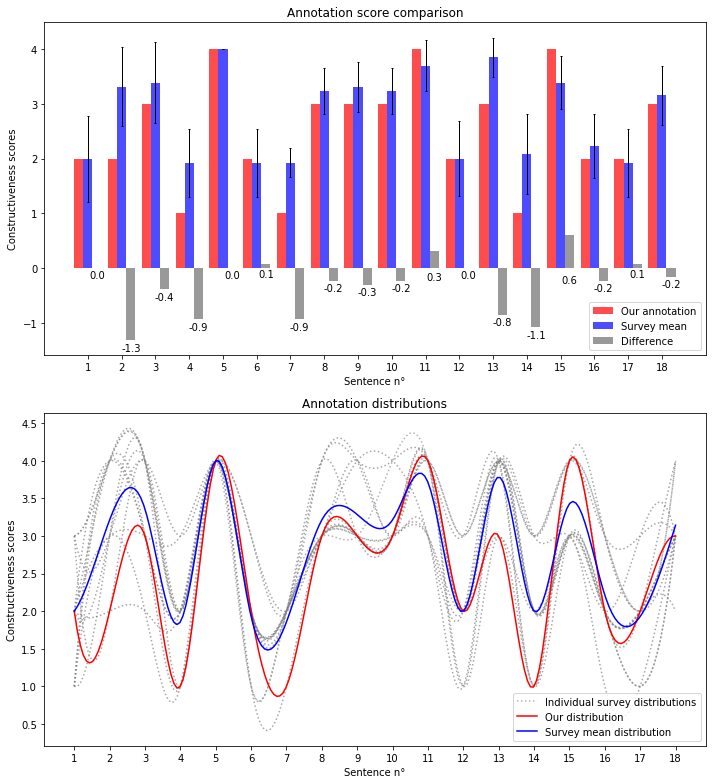

In [210]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 11))

# Part 1

rects1 = ax1.bar(x - width, np.asarray(prim['our']), width, color='#ff4d4d', label='Our annotation')
rects2 = ax1.bar(x, np.asarray(prim['mean']), width, color='#4d4dff', yerr=np.asarray(prim['std']), error_kw=dict(ecolor='black', lw=1, capsize=1, capthick=1), label='Survey mean')
rects3 = ax1.bar(x + width, np.asarray(prim['difference']), width, color='grey', alpha=0.8, label='Difference')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_title('Annotation score comparison')
ax1.set_ylabel('Constructiveness scores')
ax1.set_xlabel('Sentence n°')
# ax.set_title('Annotation Agreement')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc='lower right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

        ax1.annotate('{0:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, height - 2 if height <= 0 else -(height*100/1.5)),
                    textcoords="offset pixels",
                    ha='center', va='top')

autolabel(rects3)

# Part 2

for annot in np.asarray(sec)[:-2]:
    spl = make_interp_spline(x, annot, k=3)  # type: BSpline
    power_smooth = spl(xlin)
    ax2.plot(xlin, power_smooth, 'grey', alpha=0.7, linestyle='dotted')

spl = make_interp_spline(x, np.asarray(sec)[-2], k=3)  # type: BSpline
power_smooth = spl(xlin)
ax2.plot(xlin, power_smooth, 'grey', alpha=0.6, linestyle='dotted', label='Individual survey distributions')
    
spl = make_interp_spline(x, np.asarray(sec)[-1], k=3)  # type: BSpline
power_smooth = spl(xlin)
ax2.plot(xlin, power_smooth, 'red', alpha=1, linestyle='solid', label='Our distribution')

spl = make_interp_spline(x, sec_mean, k=3)  # type: BSpline
power_smooth = spl(xlin)
ax2.plot(xlin, power_smooth, 'blue', alpha=1, linestyle='solid', label='Survey mean distribution')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_title('Annotation distributions')
ax2.set_ylabel('Constructiveness scores')
ax2.set_xlabel('Sentence n°')
# ax.set_title('Annotation Agreement')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend(loc='lower right')

fig.tight_layout()

#fig.savefig(PATH_IMAGES + 'agreement_4classes_2figures.png', format='png', bbox_inches='tight')
plt.show()

## Experiment 2

In [17]:
e_2 = e_2.dropna().copy()
if 'Unnamed: 0' in e_2.columns:
    e_2 = e_2.drop('Unnamed: 0', axis=1)

In [19]:
e_2

,text_review,annot_1,annot_2,confidence /10
0,"It's really nice, light and compact but the op...",c,d,8
1,great,a,a,10
2,Very nice. Well crafted,b,b,10
3,"Simply amazing! I used it on my Glock 30, rea...",c,c,10
4,This is my favorite cyanoacrylate gap filling ...,c,d,10
5,The hooks are very convenient for hanging extr...,c,d,10
6,good happy with them,b,b,8
7,VEry well done documentaries. If you are inter...,c,d,10
8,Excellent movies Kathy Bates is one of my favo...,b,b,5
9,Is not a good deal when you pay for new and yo...,b,b,8


In [28]:
annot1, annot2 = np.asarray(e_2['annot_1']), np.asarray(e_2['annot_2'])

In [59]:
def repl_val(n):
    if n == 'a':
        return 0
    elif n == 'b':
        return 1
    elif n == 'c':
        return 2
    elif n == 'd':
        return 3
    else:
        return np.nan

int_annot1 = list(map(repl_val, annot1))
int_annot2 = list(map(repl_val, annot2))

bin_annot1 = [0 if x == 'a' or x == 'b' else 1 for x in annot1]
bin_annot2 = [0 if x == 'a' or x == 'b' else 1 for x in annot2]

#### Computing various metrics

In [122]:
print("Cohen's kappa - 4 classes:", cohen_kappa_score(int_annot1, int_annot2, weights='quadratic'))
print("Cohen's kappa - 2 classes:", cohen_kappa_score(bin_annot1, bin_annot2, weights='quadratic'))
print("")

print("Spearman's rho - 4 classes:", spearmanr(int_annot1, int_annot2)[0], spearmanr(int_annot1, int_annot2)[1])
print("Spearman's rho - 2 classes:", spearmanr(bin_annot1, bin_annot2)[0], spearmanr(bin_annot1, bin_annot2)[1])
print("")

print("Person's correlation - 4 classes:", pearsonr(int_annot1, int_annot2))
print("Person's correlation - 2 classes:", pearsonr(bin_annot1, bin_annot2))
print("")

print("Kendall's tau - 4 classes:", kendalltau(int_annot1, int_annot2)[0], kendalltau(int_annot1, int_annot2)[1])
print("Kendall's tau - 2 classes:", kendalltau(bin_annot1, bin_annot2)[0], kendalltau(bin_annot1, bin_annot2)[1])
print("")

print("Wilcoxon's signed rank test - 4 classes:", wilcoxon(int_annot1, int_annot2, 'pratt')[0], wilcoxon(int_annot1, int_annot2, 'pratt')[1])
print("Wilcoxon's signed rank test - 2 classes:", wilcoxon(bin_annot1, bin_annot2, 'pratt')[0], wilcoxon(bin_annot1, bin_annot2, 'pratt')[1])

Cohen's kappa - 4 classes: 0.7572815533980582
Cohen's kappa - 2 classes: 0.7906197654941374

Spearman's rho - 4 classes: 0.8351969991875762 4.66793722808342e-14
Spearman's rho - 2 classes: 0.7969335501652227 4.414279606748595e-12

Person's correlation - 4 classes: (0.8227464470410826, 2.3091143261145734e-13)
Person's correlation - 2 classes: (0.7969335501652225, 4.414279606748695e-12)

Kendall's tau - 4 classes: 0.7778825782779683 5.474114292416332e-10
Kendall's tau - 2 classes: 0.7969335501652227 2.4255288368277895e-08

Wilcoxon's signed rank test - 4 classes: 123.0 0.0028599382084640882
Wilcoxon's signed rank test - 2 classes: 48.0 0.17971249487899976


#### Ploting the distributions

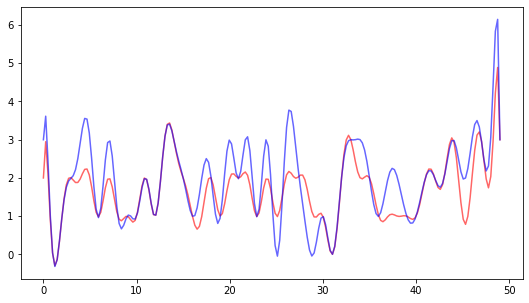

In [101]:
fig, ax = plt.subplots(figsize=(9, 5))

labels = list(range(1, 51))
x = np.arange(len(labels))
xlin = np.linspace(x.min(), x.max(), 200)


for i, color in ((int_annot1, 'red'), (int_annot2, 'blue')):
    spl = make_interp_spline(x, i, k=7)  # type: BSpline
    power_smooth = spl(xlin)
    ax.plot(xlin, power_smooth, color, alpha=0.6, linestyle='solid', label='Individual survey distributions')